In [45]:
import io
import os
import platform
import pdb

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.pyplot import cm

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn import preprocessing

In [73]:
data=pd.read_csv('ottawa.csv')
data.replace(9999,np.nan,inplace=True)
data.replace(-999,np.nan,inplace=True)
# data.fillna(np.mean(data),inplace=True)
data[95:110]

,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Stn Press (kPa),SO2,NO,NO2,NOx,CO,O3,PM25
95,-6.8,-9.0,85.0,NaN,0.0,99.50,0.0,1.0,3.0,4.0,0.16,27.0,4.0
96,-7.7,-9.9,84.0,NaN,0.0,99.60,0.0,1.0,3.0,4.0,0.16,28.0,4.0
97,-8.3,-9.9,88.0,NaN,0.0,99.70,1.0,1.0,2.0,3.0,0.15,28.0,4.0
98,-10.0,-12.7,80.0,NaN,0.0,99.86,0.0,1.0,2.0,3.0,0.15,29.0,3.0
99,-11.6,-15.0,76.0,NaN,0.0,100.04,NaN,NaN,NaN,NaN,NaN,NaN,3.0
100,-13.3,-16.2,79.0,NaN,0.0,100.24,1.0,1.0,2.0,3.0,0.14,31.0,3.0
101,-14.3,-18.0,74.0,NaN,0.0,100.36,1.0,1.0,3.0,4.0,0.13,32.0,3.0
102,-15.3,-18.9,74.0,NaN,0.0,100.54,0.0,1.0,4.0,5.0,0.14,31.0,3.0
103,-16.3,-20.0,73.0,NaN,0.0,100.72,0.0,2.0,4.0,6.0,0.15,31.0,2.0
104,-17.5,-21.4,71.0,NaN,0.0,100.85,0.0,2.0,5.0,7.0,0.15,31.0,2.0


In [78]:
for i in range(len(data)):
    for j in range(len(data.columns)):
        if np.isnan(data.iat[i,j]):
            if i==0:
                data.iloc[i,j]=data.iat[i+1,j]
            elif i==len(data)-1:
                data.iloc[i,j]=data.iat[i-1,j]
            else:
                data.iloc[i,j]=np.nanmean([data.iat[i-1,j],data.iat[i+1,j]])

In [79]:
data.head()

,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Stn Press (kPa),SO2,NO,NO2,NOx,CO,O3,PM25
0,-7.0,-13.8,58.0,22.0,18.0,100.17,1.0,1.0,9.0,10.0,0.18,27.0,8.0
1,-6.8,-13.5,59.0,22.0,16.0,100.11,1.0,1.0,9.0,10.0,0.18,26.0,8.0
2,-6.9,-13.7,58.0,23.0,20.0,100.10,0.0,1.0,8.0,9.0,0.19,27.0,7.0
3,-7.1,-13.6,60.0,23.0,16.0,100.05,0.0,1.0,8.0,9.0,0.18,27.0,6.0
4,-7.1,-13.4,61.0,23.0,16.0,100.01,0.0,1.0,7.0,8.0,0.17,28.0,5.0


In [80]:
dataset=pd.DataFrame(data,columns=data.columns[:])
scaler = preprocessing.MinMaxScaler() 
scaled_values = scaler.fit_transform(dataset) 
dataset.loc[:,:] = scaled_values

In [81]:
data.head()

,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Stn Press (kPa),SO2,NO,NO2,NOx,CO,O3,PM25
0,0.347687,0.366149,0.505882,0.611111,0.391304,0.456954,0.0625,0.010526,0.176471,0.070423,0.107143,0.369863,0.123077
1,0.350877,0.371330,0.517647,0.611111,0.347826,0.447020,0.0625,0.010526,0.176471,0.070423,0.107143,0.356164,0.123077
2,0.349282,0.367876,0.505882,0.638889,0.434783,0.445364,0.0000,0.010526,0.156863,0.063380,0.119048,0.369863,0.107692
3,0.346093,0.369603,0.529412,0.638889,0.347826,0.437086,0.0000,0.010526,0.156863,0.063380,0.107143,0.369863,0.092308
4,0.346093,0.373057,0.541176,0.638889,0.347826,0.430464,0.0000,0.010526,0.137255,0.056338,0.095238,0.383562,0.076923


In [82]:
data_set=np.asarray(dataset,dtype=np.float32)
seq_len=30 + 1
x=len(data_set)-seq_len
sequences = [data_set[t:t+seq_len] for t in range(x)]
seq=torch.FloatTensor(sequences)

In [83]:
seq.shape

torch.Size([17513, 31, 13])

In [84]:
split_row=round(0.90*seq.size(0))
x_train_set=seq[:split_row, :-1]
y_train_set=seq[:split_row, -1]
x_valid_set=seq[split_row:, :-1]
y_valid_set=seq[split_row:, -1]

In [85]:
x_valid_set.shape

torch.Size([1751, 30, 13])

In [86]:
class LSTM(nn.Module):
    def __init__(self,input_size,hidden_size,num_layers=1,dropout=0,bidirectional=False):
        super(LSTM,self).__init__()
        self.input_size=input_size
        self.hidden_size=hidden_size
        self.num_layers=num_layers
        self.dropout=dropout
        self.bidirectional=bidirectional
        self.lstm = nn.LSTM(input_size,
                            hidden_size,
                            num_layers,
                            dropout=dropout,
                            bidirectional=bidirectional)
        self.linear = nn.Linear(hidden_size, 13)
        
    def forward(self,inputs,hidden):
        outputs,hidden=self.lstm(inputs,hidden)
        predictions=self.linear(outputs[-1])
        return predictions,outputs,hidden
    
    def init_hidden(self,batch_size):
        num_directions=2 if self.bidirectional else 1
        hidden = (torch.zeros(self.num_layers*num_directions, batch_size, self.hidden_size),
                  torch.zeros(self.num_layers*num_directions, batch_size, self.hidden_size))
        return hidden

In [87]:
def get_batch(x,y,i,batch_size):
    if x.dim() == 2:
        x = x.unsqueeze(2)
    batch_x = x[(i*batch_size):(i*batch_size)+batch_size, :, :]
    batch_y = y[(i*batch_size):(i*batch_size)+batch_size]

    # Reshape Tensors into (seq_len, batch_size, input_size) format for the LSTM.
    batch_x = batch_x.transpose(0, 1)
    
    return batch_x, batch_y

In [88]:
def train(model,x_train_set,y_train_set,optimizer,batch_size,epoch):
    num_sequences=x_train_set.size(0)
    num_batches=num_sequences//batch_size
    
    total_loss=0
    
    model.train()
    for i in range(num_batches):
        # Get input and target batches and reshape for LSTM.
        batch_x, batch_y = get_batch(x_train_set, y_train_set, i, batch_size)

        # Reset the gradient.
        lstm.zero_grad()
        
        # Initialize the hidden states (see the function lstm.init_hidden(batch_size)).
        hidden = lstm.init_hidden(batch_size)
        
        # Complete a forward pass.
        y_pred, outputs, hidden = lstm(batch_x,hidden)
        
        # Calculate the loss with the 'loss_fn'.
        loss = loss_fn(y_pred,batch_y)
        
        # Compute the gradient.
        loss.backward()
        
        # Clip to the gradient to avoid exploding gradient.
        nn.utils.clip_grad_norm_(lstm.parameters(), max_grad_norm)

        # Make one step with optimizer.
        optimizer.step()
        
        # Accumulate the total loss.
        total_loss += loss.data
        
    print("Epoch {}: Loss = {:.8f}".format(epoch+1, total_loss/num_batches))
    return total_loss/num_batches,y_pred[-1]

In [89]:
def eval(model,x_valid_set,y_valid_set,optimizer,batch_size):
    num_sequences=x_valid_set.size(0)
    num_batches=num_sequences//batch_size
    
    total_loss=0
    
    model.eval()
    for i in range(num_batches):
        # Get input and target batches and reshape for LSTM.
        batch_x, batch_y = get_batch(x_valid_set, y_valid_set, i, batch_size)

        # Reset the gradient.
        lstm.zero_grad()
        
        # Initialize the hidden states (see the function lstm.init_hidden(batch_size)).
        hidden = lstm.init_hidden(batch_size)
        
        # Complete a forward pass.
        y_pred, outputs, hidden = lstm(batch_x,hidden)
        
        # Calculate the loss with the 'loss_fn'.
        loss = loss_fn(y_pred,batch_y)
        
        # Compute the gradient.
        loss.backward()
        
        # Clip to the gradient to avoid exploding gradient.
        nn.utils.clip_grad_norm_(lstm.parameters(), max_grad_norm)

        # Make one step with optimizer.
        optimizer.step()
        
        # Accumulate the total loss.
        total_loss += loss.data

    print("Validation: Loss = {:.8f}".format(total_loss/num_batches))
    return total_loss/num_batches,y_pred[-1]

In [90]:
def save_model(epoch, model, path='./'):
    
    # file name and path 
    filename = path + 'neural_network_{}.pt'.format(epoch)
    
    # load the model parameters 
    torch.save(model.state_dict(), filename)
    
    
    return model

In [91]:
def load_model(epoch, model, path='./'):
    
    # file name and path 
    filename = path + 'neural_network_{}.pt'.format(epoch)
    
    # load the model parameters 
    model.load_state_dict(torch.load(filename))
    
    
    return model

Training model for 30 epoch
Epoch 1: Loss = 0.01200147
Validation: Loss = 0.00757209
Epoch 2: Loss = 0.00705300
Validation: Loss = 0.00611064
Epoch 3: Loss = 0.00618175
Validation: Loss = 0.00566987
Epoch 4: Loss = 0.00593463
Validation: Loss = 0.00558842
Epoch 5: Loss = 0.00573012
Validation: Loss = 0.00542835
Epoch 6: Loss = 0.00561093
Validation: Loss = 0.00521220
Epoch 7: Loss = 0.00553248
Validation: Loss = 0.00504404
Epoch 8: Loss = 0.00545452
Validation: Loss = 0.00490081
Epoch 9: Loss = 0.00536878
Validation: Loss = 0.00482350
Epoch 10: Loss = 0.00528676
Validation: Loss = 0.00481969
Epoch 11: Loss = 0.00525084
Validation: Loss = 0.00483351
Epoch 12: Loss = 0.00520057
Validation: Loss = 0.00474802
Epoch 13: Loss = 0.00516741
Validation: Loss = 0.00472858
Epoch 14: Loss = 0.00514349
Validation: Loss = 0.00479534
Epoch 15: Loss = 0.00512201
Validation: Loss = 0.00482555
Epoch 16: Loss = 0.00510859
Validation: Loss = 0.00475901
Epoch 17: Loss = 0.00509026
Validation: Loss = 0.0047

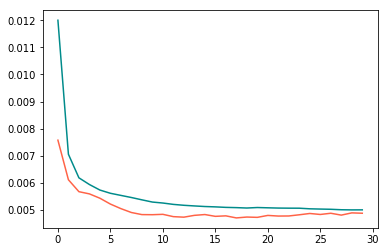

In [92]:
input_size=13
hidden_size=24
num_layers=2
lstm=LSTM(input_size,hidden_size,num_layers)

learning_rate=0.01
max_grad_norm=5
loss_fn = nn.MSELoss()
optimizer = optim.Adam(lstm.parameters(), lr=learning_rate,weight_decay=0.000001)

batch_size = 8
num_epochs = 30 #3
# num_sequences = x_train_set.size(0)
# num_batches = num_sequences //batch_size

checkpoint_freq = 10
path = './'

train_losses=[]
valid_losses=[]

print("Training model for {} epoch".format(num_epochs))
for epoch in range(num_epochs):
#     total_loss = 0

    # Shuffle input and target sequences.
    idx = torch.randperm(x_train_set.size(0))
    x = x_train_set[idx]
    y = y_train_set[idx]
    
    train_loss,train_pm25=train(lstm,x_train_set,y_train_set,optimizer,batch_size,epoch)
    valid_loss,valid_pm25=eval(lstm,x_valid_set,y_valid_set,optimizer,batch_size)
    
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    # Checkpoint
    if epoch % checkpoint_freq ==0:
        save_model(epoch, lstm, path)
        
# Last checkpoint
save_model(num_epochs, lstm, path)
    
print("\n\n\nOptimization ended.\n")

plt.plot(train_losses, color="darkcyan", label="train")
plt.plot(valid_losses, color="tomato",label="validation")
plt.show()

In [98]:
def predict_one_hour(model,x_valid_set,input_size,num_steps):
    predictions=torch.zeros(num_steps)
    for i, x in enumerate(x_valid_set):
        hidden=model.init_hidden(1)
        y_pred,_,_=model(x.contiguous().view(-1, 1, input_size),hidden)
        predictions[i]=y_pred[:,-1]
    return predictions

In [99]:
one_step_predictions = predict_one_hour(lstm, x_valid_set, input_size, y_valid_set.size(0))

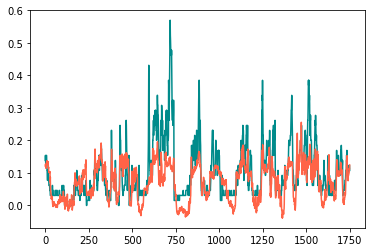

In [101]:
plt.plot(y_valid_set[:,-1].data.numpy(),color='darkcyan')
plt.plot(one_step_predictions.data.numpy(),color='tomato')
plt.show()